<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/BREASTCANCER_PROJECT_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_palette('bright')
warnings.filterwarnings('ignore')

In [161]:
data = pd.read_excel("BreastCancer_Prognostic_v1.xlsx")
data.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    int64  
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    int64  
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

In [163]:
data.describe()

,ID,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [164]:
data['Lymph_Node_Status'].unique()

array([5, 2, 0, '?', 10, 1, 20, 6, 13, 4, 17, 15, 11, 9, 8, 7, 3, 14, 27,
       24, 18, 16, 21], dtype=object)

In [165]:
sum(data['Lymph_Node_Status'] == '?')

4

In [166]:
data['Lymph_Node_Status'] = data['Lymph_Node_Status'].replace('?', data['Lymph_Node_Status'].value_counts().index[0])

In [167]:
data.drop('ID', axis= 1, inplace= True)

In [168]:
data.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [169]:
data.isnull().sum()

Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fractal_dimension      0
Tumor_Si

In [170]:
#EXPLORATORY DATA ANALYSIS

In [171]:
data['Outcome'].value_counts()

N    151
R     47
Name: Outcome, dtype: int64

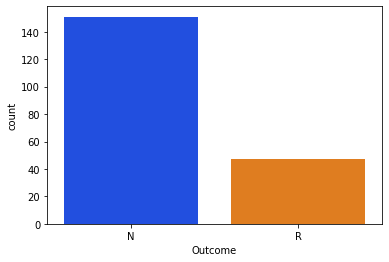

In [172]:
sns.countplot(data['Outcome'])
plt.show()

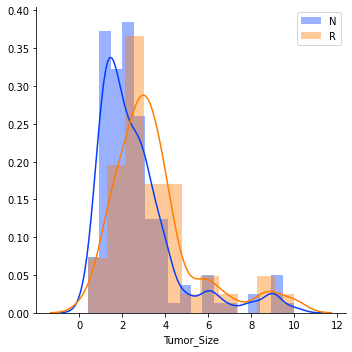

In [173]:
sns.FacetGrid(data,hue= "Outcome", size=5).map(sns.distplot, "Tumor_Size")
plt.legend()
plt.show()

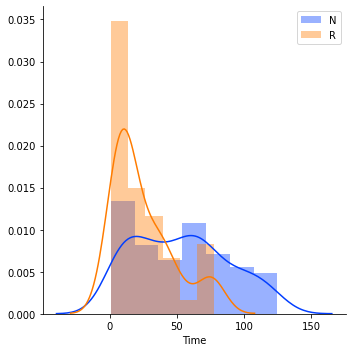

In [174]:
sns.FacetGrid(data,hue= "Outcome", size=5).map(sns.distplot, "Time")
plt.legend()
plt.show()

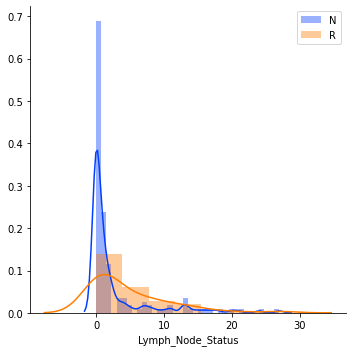

In [175]:
sns.FacetGrid(data,hue= "Outcome", size=5).map(sns.distplot, "Lymph_Node_Status")
plt.legend()
plt.show()

In [176]:
#FEATURE ENGINEERING

In [177]:
data['Outcome'] = data['Outcome'].map({"R":1, "N":0})

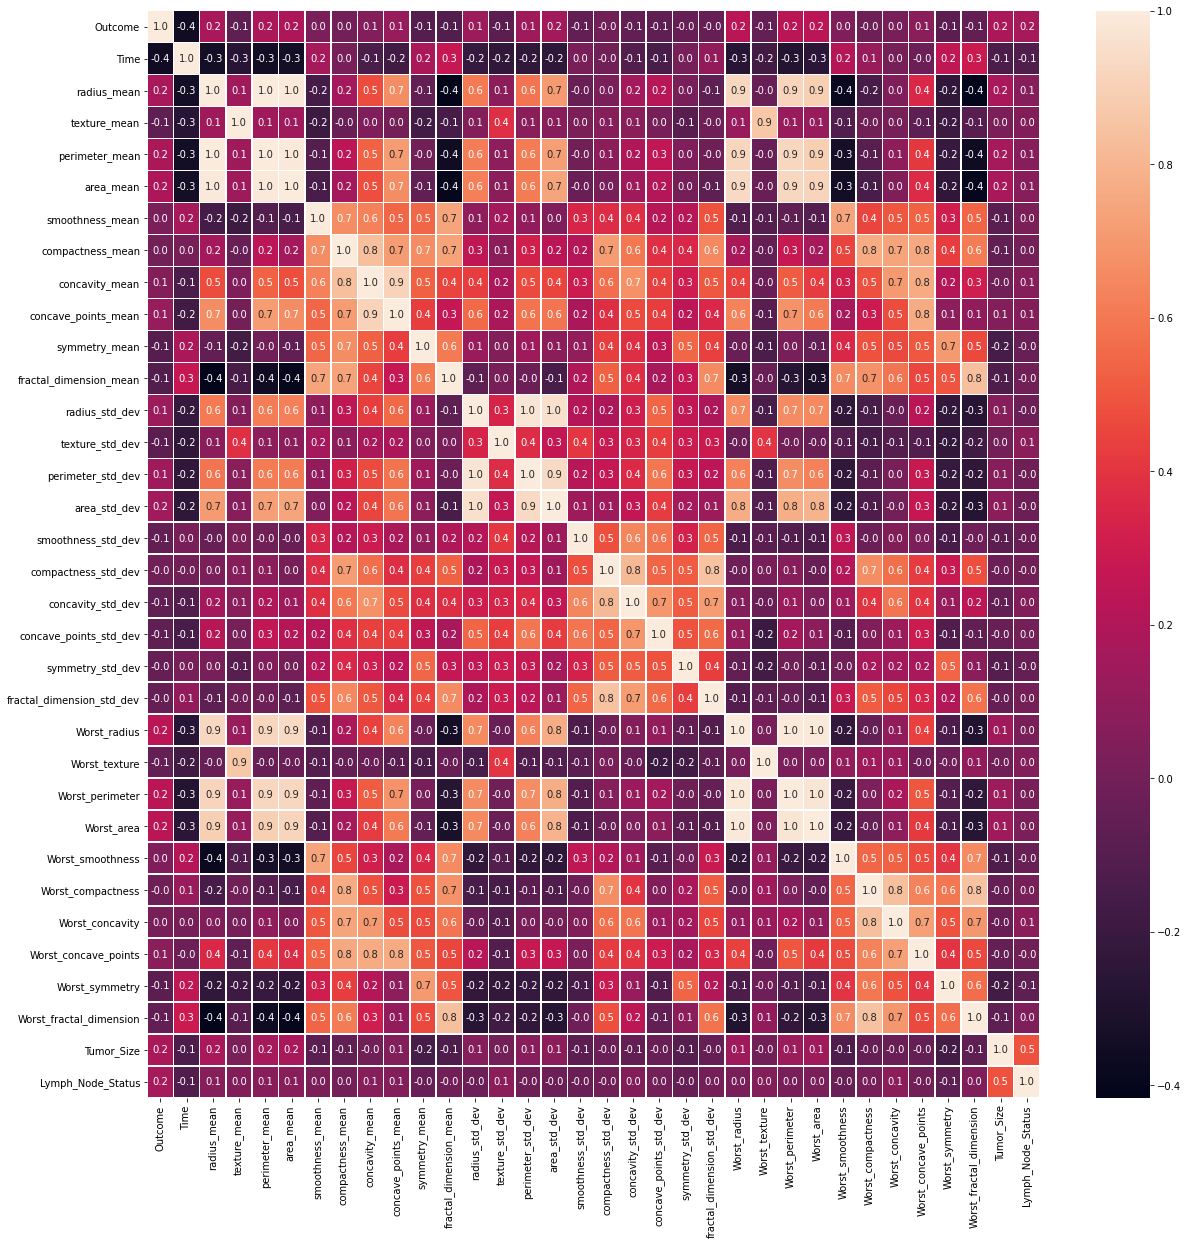

In [178]:
cor = data.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cor,annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [179]:
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [180]:
selected_columns = data.columns[columns]

In [181]:
selected_columns

Index(['Outcome', 'Time', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_dev', 'texture_std_dev',
       'smoothness_std_dev', 'compactness_std_dev', 'concavity_std_dev',
       'concave_points_std_dev', 'symmetry_std_dev',
       'fractal_dimension_std_dev', 'Worst_texture', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status'],
      dtype='object')

In [182]:
df = data[selected_columns]

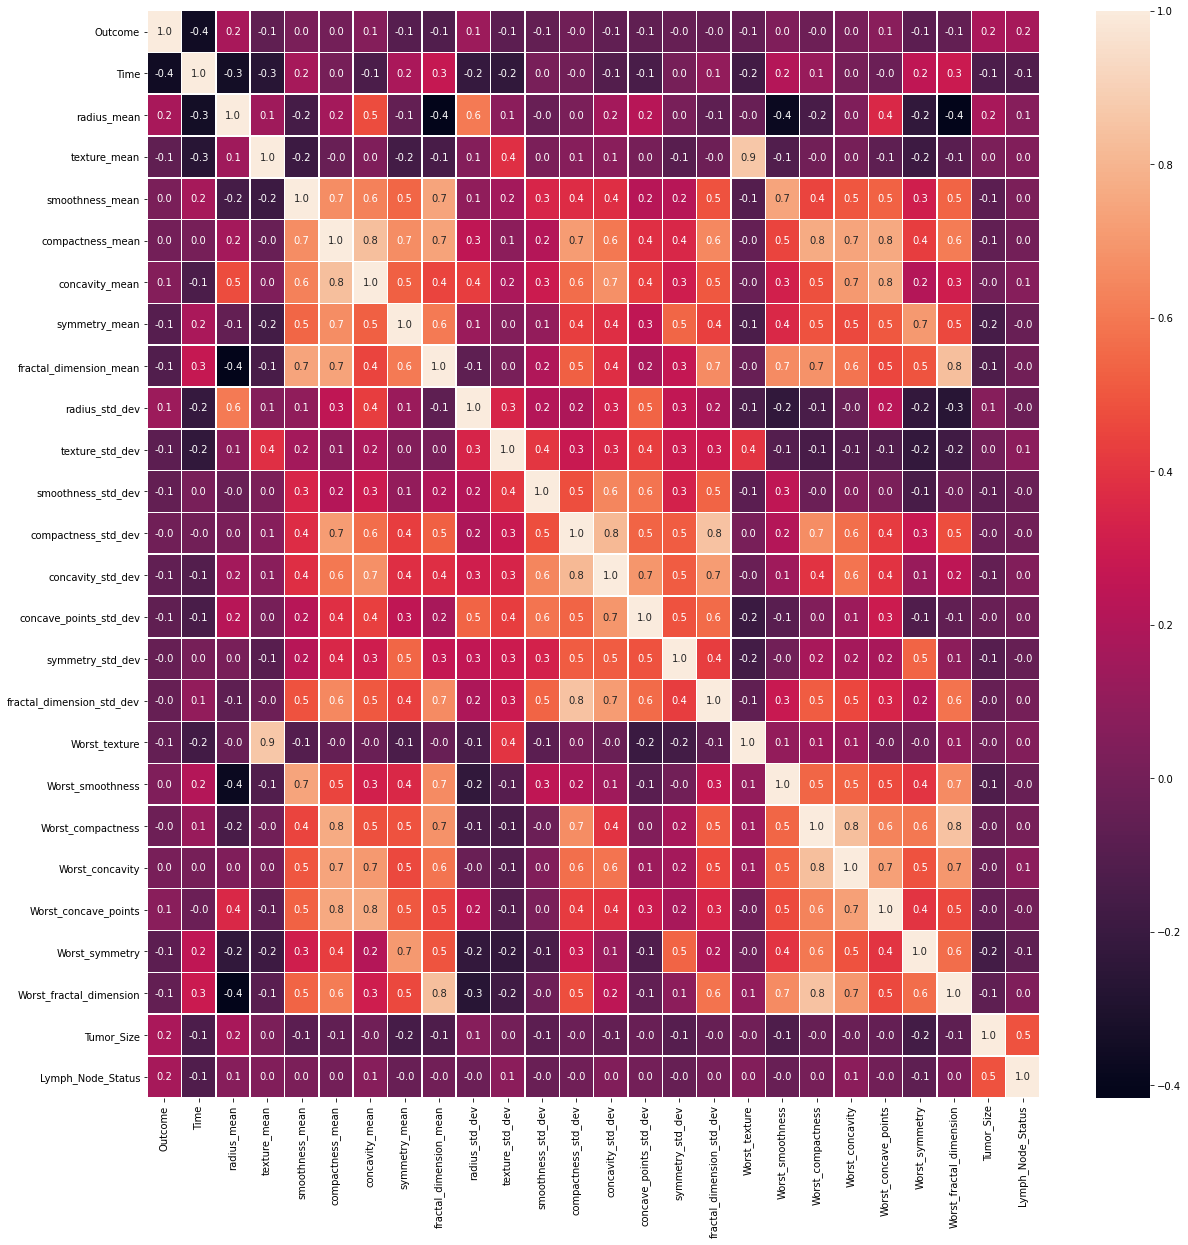

In [183]:
cor = df.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cor,annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [184]:
#MODEL BUILDING

In [185]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [186]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [187]:
sc = StandardScaler()

In [188]:
X = sc.fit_transform(X)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [190]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [191]:
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('XGBoost', XGBClassifier()))

In [192]:
def train(X_train, y_train):
    warnings.filterwarnings('ignore')
    results = []
    names = []
    for name, model in models:
        acc = cross_val_score(model, X_train, y_train, cv = cv, scoring= 'f1')
        results.append(acc.mean())
        names.append(name)

    res = pd.DataFrame(list(zip(names, results)), columns=["Algorithm", "F1 Score"])
    return res

In [193]:
train(X_train, y_train)

,Algorithm,F1 Score
0,Decision Tree,0.349848
1,KNN,0.416190
2,Naive Bayes,0.362618
3,SVM,0.361905
4,Random Forest,0.266667
5,Logistic Regression,0.443492
6,XGBoost,0.455476


In [194]:
#XGBOOST : BETTER RESULTS

In [195]:
def show_result(model):

    y_pred = model.predict(X_test)
    print("\n\nClassification Report: ")
    print(classification_report(y_test, y_pred))
    
    #ploting comfusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['N','R']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
    # Ploting ROC curve
    fpr, tpr, _ = roc_curve(y_pred,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    accu = accuracy_score(y_test, y_pred)
    print("\nAccuracy Of the Model: ",accu *100,"%\n")
    print("F1 Score: %.2f%%" % (f1_score(y_test, y_pred, average='weighted') * 100.0))


In [196]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)



Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.57      0.50      0.53         8

    accuracy                           0.82        40
   macro avg       0.73      0.70      0.71        40
weighted avg       0.82      0.82      0.82        40



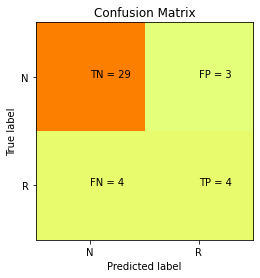

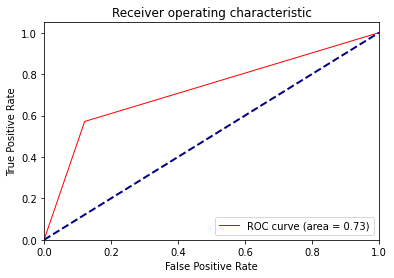


Accuracy Of the Model:  82.5 %

F1 Score: 82.05%


In [197]:
show_result(model)

In [198]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

In [200]:
def remove_outliers(X, y, f=2, distance=2):
      
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in X.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]

    # importing Counter
    from collections import Counter
    
    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.items():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    X1 = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    y1 = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)

    # return data without outliers
    return X1, y1


In [201]:
# Define a function to resample data
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

def resample(X,y):

    X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(X, y)
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        
    return X_resampled, y_resampled

In [202]:
X1, y1 = remove_outliers(scaled_X, y)
X_new, y_new = resample(X1, y1)

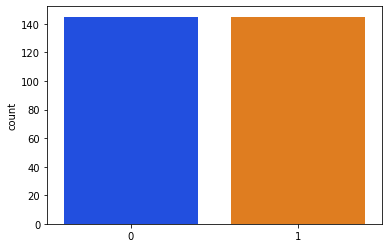

In [203]:
sns.countplot(y_new)
plt.show()

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=42)

In [205]:
train(X_train, y_train)

,Algorithm,F1 Score
0,Decision Tree,0.789027
1,KNN,0.786865
2,Naive Bayes,0.713523
3,SVM,0.822246
4,Random Forest,0.864428
5,Logistic Regression,0.739200
6,XGBoost,0.843532


In [206]:
model = RandomForestClassifier(random_state= 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [207]:
cross_val_score(model, X_train, y_train,cv=cv, scoring='accuracy').mean() * 100

89.69202898550725



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.86      1.00      0.93        25

    accuracy                           0.93        58
   macro avg       0.93      0.94      0.93        58
weighted avg       0.94      0.93      0.93        58



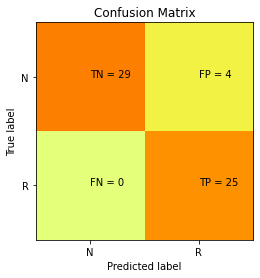

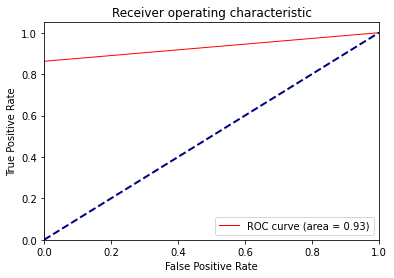


Accuracy Of the Model:  93.10344827586206 %

F1 Score: 93.14%


In [208]:
show_result(model)

In [209]:
pip install tpot

In [210]:
from tpot import TPOTClassifier

In [211]:
tpot = TPOTClassifier(
    generations= 10,
    verbosity= 2,
    scoring='f1',
    random_state= 42,
    disable_update_check= True,
    n_jobs= -1,
    cv = cv
)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8939840208101077
Generation 2 - Current best internal CV score: 0.8939840208101077
Generation 3 - Current best internal CV score: 0.9001189486841661
Generation 4 - Current best internal CV score: 0.9001189486841661
Generation 5 - Current best internal CV score: 0.9032118702553487
Generation 6 - Current best internal CV score: 0.9149342251950948
Generation 7 - Current best internal CV score: 0.9149422172030868
Generation 8 - Current best internal CV score: 0.9149422172030868
Generation 9 - Current best internal CV score: 0.9149422172030868

Best pipeline: GradientBoostingClassifier(FastICA(input_matrix, tol=0.0), learning_rate=0.1, max_depth=8, max_features=0.25, min_samples_leaf=5, min_samples_split=19, n_estimators=100, subsample=0.55)


TPOTClassifier(config_dict=None, crossover_rate=0.1,
               cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
               disable_update_check=True, early_stop=None, generations=10,
               log_file=<ipykernel.iostream.OutStream object at 0x7f2d98deb9b0>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=42, scoring='f1', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [212]:
print(tpot.score(X_test, y_test))

0.8749999999999999




Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.91      0.84      0.87        25

    accuracy                           0.90        58
   macro avg       0.90      0.89      0.89        58
weighted avg       0.90      0.90      0.90        58



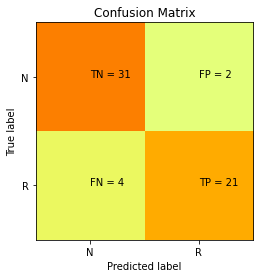

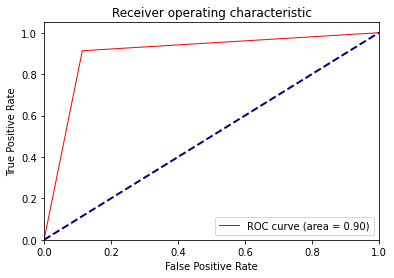


Accuracy Of the Model:  89.65517241379311 %

F1 Score: 89.59%


In [213]:
show_result(tpot)

In [214]:
y_pred = tpot.predict(X_test)

In [215]:
y_predict = pd.DataFrame(y_pred, columns=['Outcome'])
y_predict['Outcome']= y_predict['Outcome'].map({1: 'R', 0: 'N'})
y_predict.to_excel("Predicted.xlsx", index= False)

In [216]:
tpot.export('model.py')